# Problem statement
### To predict agricultural Nitrous oxide $(N_2 O)$ emissions from intensively managed cropping systems.

# Assumptions
* **Use of Nitrogen based fertilizer** is proportional to the agricultural $N_2 O$ emissions


* **Rate of Nitrification process** in the soil is proportional to the agricultural $N_2 O$ emissions.


* **Soil profile, Water status, Aeration, Temperature** and **pH** are few factors that majoryly affect the rate of soil nitrification, hence contributing toward agricultural $N_2 O$ emissions.


* **Oxidation of Ammonia** to nitrate causes soil nitrification and hence, presence of soil Ammonia levels is proportional to $N_2 O$ emissions.

# Loading Data

In [1]:
# Data manipulation libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)

# Data visualization libraries
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = 'blue'
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [2]:
# Loading the data and viewing 5 sample observations
data = pd.read_excel('Saha_et_al_2020_ERL_Data.xlsx', sheet_name='Data')
data.sample(5)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
1091,2017-07-07,2017,BCSE_KBS,Building,R1,July,Corn,Annual,27.918279,170,9.00,11.000,23.30,59,17,0.503443,22.270345,33.547679,62.500000,637.500000,1.174072
2043,2007-09-12,2007,MCSE-T2,Testing,R4,September,TRIAE,Annual,1.170000,86,13.97,19.685,12.94,166,141,0.438978,3.556000,12.573000,128.333333,491.666667,1.806000
40,2012-06-26,2012,BCSE_KBS,Building,R1,June,Corn,Annual,2.311027,170,0.00,1.520,19.40,49,15,0.465274,39.276256,83.245123,62.500000,637.500000,1.174072
783,2016-04-08,2016,BCSE_KBS,Building,R1,April,Corn,Annual,5.575349,170,17.00,24.000,-0.10,343,296,0.740042,10.691078,24.236975,62.500000,637.500000,1.174072
855,2016-07-06,2016,BCSE_KBS,Building,R1,July,Corn,Annual,7.662802,170,0.00,4.000,23.80,58,19,0.534295,27.343942,56.947139,62.500000,637.500000,1.174072


In [3]:
# Column names
columns = list(data.columns)
print("="*5, "\033[1;35m Column Names \033[0m", "="*5)
columns

=====  Column Names  =====


['Date',
 'Year',
 'Experiment',
 'DataUse',
 'Replication',
 'Month',
 'Vegetation',
 'VegType',
 'N2O',
 'N_rate',
 'PP2',
 'PP7',
 'AirT',
 'DAF_TD',
 'DAF_SD',
 'WFPS25cm',
 'NH4',
 'NO3',
 'Clay',
 'Sand',
 'SOM']

In [4]:
# Renaming columns for ease
columnNames_map = {
    'Date':'date',
    'Year':'year',
    'Experiment':'exp',
    'DataUse':'datause',
    'Replication':'rep',
    'Month':'month',
    'Vegetation':'veg',
    'VegType':'vegtype',
    'N2O':'n2o',
    'N_rate':'nrate',
    'PP2':'pp2',
    'PP7':'pp7',
    'AirT':'airt',
    'DAF_TD':'daftd',
    'DAF_SD':'dafsd',
    'WFPS25cm':'wfps',
    'NH4':'nh4',
    'NO3':'no3',
    'Clay':'clay',
    'Sand':'sand',
    'SOM':'som'
}
data = data.rename(columns=columnNames_map)
# Creating a copy of dataframe for analysis
df = data.copy()
df.head()

,date,year,exp,datause,rep,month,veg,vegtype,n2o,nrate,pp2,pp7,airt,daftd,dafsd,wfps,nh4,no3,clay,sand,som
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012-02-19,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012-03-16,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


## Feature Information
#### Date >> date  
Gas Sampling days


#### Year >> year  
Calendar year


#### Experiment >> exp    
Long term experiments


#### DataUse >> datause  
Data to be used for training and testing


#### Replication >> rep  
Experimental replications


#### Month >> month  
Month of the year


#### Vegetation >> veg  
Crops used


#### VegType >> vegtype  
Periodicity of crop cultivation


#### N2O >> n2o  
Atmospheric Nitrous Oxide  concentration in ppb/yr


#### N_rate >> nrate  
Nitrogen fertilizer application rate in kg/ha


#### PP2 >> pp2  
Cumulative precipitation in the last two days before gas sampling in mm


#### PP7 >> pp7  
Cumulative precipitation in the last week before gas sampling in mm


#### AirT >> airt  
Mean daily air temperature in °C


#### DAF_TD >> daftd  
Days after top-dressed Nitrogen fertilization


#### DAF_SD >> dafsd  
Days after side-dressed Nitrogen fertilization


#### WFPS25cm: wfps  
Water filled pore space in the top 25cm soil layer. (Approximation of soil Oxygen limitation  


#### NH4 >> nh4  
Ammonium Nitrogen content in the top 25cm soil layer in kg/ha


#### NO3 >> no3  
Nitrate Nitrogen content in the top 25cm soil layer in kg/ha


#### Clay >> clay  
Clay content in g/kg


#### Sand >> sand  
Sand content in g/kg


#### SOM >> som  
Soil organic matter concentration in %

#### Few questions that could be explored using the data:
1. Is there any significant annual variation in N2O levels?
2. Does N2O levels vary with respect to number of days post/prior to sampling?
3. Is there any change in N2O levels with respect to number of experimental replications?
4. Does N2O levels vary month wise?
5. Is there any crop-wise variation in N2O levels?
6. Does the Nitrogen fertilizer application rate causes changes in N2O levels?
7. Does external agents like rainfall, air temperature have any effect on N2O flux levels?
8. Does the amount of nitrogen content in the soil in the form of NH4 and NO3 cause any significant variation in N2O flux?
9. Does soil content including sand, clay and organic matter contribute towards N2O flux release?

# Data Information

In [5]:
# Column names
columns = list(df.columns)
print("="*5, "\033[1;35m Column Names \033[0m", "="*5)
print(columns, "\n")

# Numerical column names
num_cols = [col for col in df if df[col].dtypes in ['int8', 'int16', 'float16', 'int32', 'float32', 'int64', 'float64']]
num_cols_num = len(num_cols)
print("="*5, "\033[1;34m Numerical Features \033[0m", "="*5)
print("No of Numerical features: ", num_cols_num, "\n")
print(num_cols, "\n")

# Non-numerical column names
non_num_cols = [col for col in df if col not in num_cols]
non_num_cols_num = len(non_num_cols)
print("="*5, "\033[1;34m Non Numerical Features \033[0m", "="*5)
print("No of Non-Numerical features: ", non_num_cols_num, "\n")
print(non_num_cols, "\n")

# Data information
print("="*10, "\033[1;92m Dataset Shape \033[0m", "="*10)
print("No of features: ", df.shape[1])
print("No of observations: ", df.shape[0], "\n")

=====  Column Names  =====
['date', 'year', 'exp', 'datause', 'rep', 'month', 'veg', 'vegtype', 'n2o', 'nrate', 'pp2', 'pp7', 'airt', 'daftd', 'dafsd', 'wfps', 'nh4', 'no3', 'clay', 'sand', 'som'] 

=====  Numerical Features  =====
No of Numerical features:  14 

['year', 'n2o', 'nrate', 'pp2', 'pp7', 'airt', 'daftd', 'dafsd', 'wfps', 'nh4', 'no3', 'clay', 'sand', 'som'] 

=====  Non Numerical Features  =====
No of Non-Numerical features:  7 

['date', 'exp', 'datause', 'rep', 'month', 'veg', 'vegtype'] 

==========  Dataset Shape  ==========
No of features:  21
No of observations:  2246 



# Target Information

In [6]:
# Function for observing the target
def view_target(df, target):
    # Observing the target
    print("\033[1;32m Target datatype: \033[0m", df[target].dtypes, "\n")
    print("="*20, "\033[1;34m  Descriptive Stats of Target  \033[0m", "="*20)
    print(pd.DataFrame(df[target]).describe().T.drop('count',axis=1))
    # subplots
    plt.figure(figsize=(8,4))
    # histogram
    ax1 = plt.subplot(1,2,1)
    cp = sns.histplot(x=df[target], kde=True, palette='Dark2')
    ax1.set_xlabel(target, fontsize=14)
 
    # pieplot
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(y=df[target], palette='Dark2')
    ax2.set_xlabel(target, fontsize=14)
    plt.tight_layout()

 Target datatype:  float64 

====================   Descriptive Stats of Target   ====================
        mean        std       min       25%       50%       75%      max
n2o  7.46861  28.488257 -7.415297  0.504316  1.972058  5.187618  593.072


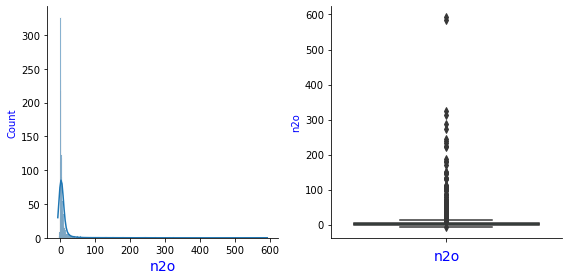

In [7]:
view_target(df, 'n2o')

##### Observations:
* Negative values for N2O concentration.
* 75% of the data is within 1 std deviation from the mean.
* Heavily right skewed data
* Extreme outliers at 583 and 593.

In [8]:
# Dropping samples corresponding to negative values for 'n2o'
n2o_neg_index = list(df[df['n2o']<0].index)
df.drop(n2o_neg_index, axis=0, inplace=True)

# Data Quality Check

In [9]:
# Checking object features
df.select_dtypes(['object']).head()

,exp,datause,rep,month,veg,vegtype
0,BCSE_KBS,Building,R1,February,Corn,Annual
1,BCSE_KBS,Building,R1,February,Corn,Annual
2,BCSE_KBS,Building,R1,February,Corn,Annual
3,BCSE_KBS,Building,R1,February,Corn,Annual
4,BCSE_KBS,Building,R1,March,Corn,Annual


We find that object type features are all categorical in nature. Hence, we will convert them to type 'category'.

In [10]:
# function for changing datatypes
def change_dtypes(df, fromtype='O', totype='category'):
    # Changing dtypes of features with type 'Object'
    for feat in [feat for feat in df.columns if df[feat].dtypes == fromtype]:
        before = df[feat].dtypes
        df[feat] = df[feat]. astype(totype)
        after = df[feat].dtypes
        print(f"Datatype of \033[1;92m{feat}\033[0m converted from: \033[1;31m{before}\033[0m to \033[1;34m{after}\033[0m \n")

In [11]:
change_dtypes(df)

Datatype of exp converted from: object to category 

Datatype of datause converted from: object to category 

Datatype of rep converted from: object to category 

Datatype of month converted from: object to category 

Datatype of veg converted from: object to category 

Datatype of vegtype converted from: object to category 



Now, we will look for samples/features to drop. For that, we will look at duplicate values and constant features as they don't provide any meaningful contribution to our solution.

In [12]:
# Checking duplicates
print("="*20, "\033[1m  Checking for duplicates  \033[0m", "="*20)
print("No of duplicate values in the dataset: ", df.duplicated().sum(), "\n")

====================   Checking for duplicates   ====================
No of duplicate values in the dataset:  0 



In [13]:
# Checking for constant features
print("="*20, "\033[1m  Checking for constant features  \033[0m", "="*20)
total_constants = [col for col in df if df[col].nunique()==1]
if len(total_constants) != 0:
    print("No of constant features: ", len(total_constants))
    print("Constant features: ", total_constants, "\n")
else:
    print("No constant features in the dataset")

====================   Checking for constant features   ====================
No of constant features:  1
Constant features:  ['vegtype'] 



In [14]:
# dropping the constant feature
df.drop('vegtype', axis=1, inplace=True)

Now, let's check for those features that might seem redundant, but might be important in arriving at our final solution. These inlcude features with low variance, imbalanced features and features with missing values.

In [15]:
# Checking for missing values
print("="*20, "\033[1m  Checking for Missing values  \033[0m", "="*20)
missing_feat = [k for k, v in df.isnull().sum().items() if v>0]
if df.isnull().sum().count() != 0:
    print("No of features with missing values: ", len(missing_feat), "\n")
    print("Features with missing values: \n", missing_feat)
else:
    print("No missing values in the dataset")

====================   Checking for Missing values   ====================
No of features with missing values:  3 

Features with missing values: 
 ['wfps', 'nh4', 'no3']


In [16]:
# Dropping missing values
df.dropna(inplace=True)

In [17]:
#info table
print("="*10, "\033[1;34m Information Table \033[0m", "="*10)
df.info()

==========  Information Table  ==========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 2245
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1868 non-null   datetime64[ns]
 1   year     1868 non-null   int64         
 2   exp      1868 non-null   category      
 3   datause  1868 non-null   category      
 4   rep      1868 non-null   category      
 5   month    1868 non-null   category      
 6   veg      1868 non-null   category      
 7   n2o      1868 non-null   float64       
 8   nrate    1868 non-null   int64         
 9   pp2      1868 non-null   float64       
 10  pp7      1868 non-null   float64       
 11  airt     1868 non-null   float64       
 12  daftd    1868 non-null   int64         
 13  dafsd    1868 non-null   int64         
 14  wfps     1868 non-null   float64       
 15  nh4      1868 non-null   float64       
 16  no3      1868 non-null   float64    

# Feature analysis

In [18]:
# Extracting numerical features
numfeat = list(df.select_dtypes(['int', 'float']).columns)
numfeat

['year',
 'n2o',
 'nrate',
 'pp2',
 'pp7',
 'airt',
 'daftd',
 'dafsd',
 'wfps',
 'nh4',
 'no3',
 'clay',
 'sand',
 'som']

In [19]:
# Extracting datetime features
datefeat = list(df.select_dtypes(['datetime64', 'timedelta64']).columns)
datefeat

['date']

In [20]:
# Extracting categorical features
catfeat = df.select_dtypes(['category', 'object']).columns
catfeat

Index(['exp', 'datause', 'rep', 'month', 'veg'], dtype='object')

In [21]:
# continuous numerical dataset
dnum = df[numfeat]
print("Dataframe shape: ", dnum.shape)
dnum.head()

Dataframe shape:  (1868, 14)


,year,n2o,nrate,pp2,pp7,airt,daftd,dafsd,wfps,nh4,no3,clay,sand,som
0,2012,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [22]:
# categorical dataset
dcat = df[catfeat]
print("Dataframe shape: ", dcat.shape)
dcat.head()

Dataframe shape:  (1868, 5)


,exp,datause,rep,month,veg
0,BCSE_KBS,Building,R1,February,Corn
1,BCSE_KBS,Building,R1,February,Corn
2,BCSE_KBS,Building,R1,February,Corn
3,BCSE_KBS,Building,R1,February,Corn
4,BCSE_KBS,Building,R1,March,Corn


# Numerical Feature analysis

In [23]:
# checking numerical feature names
dnum.columns

Index(['year', 'n2o', 'nrate', 'pp2', 'pp7', 'airt', 'daftd', 'dafsd', 'wfps',
       'nh4', 'no3', 'clay', 'sand', 'som'],
      dtype='object')

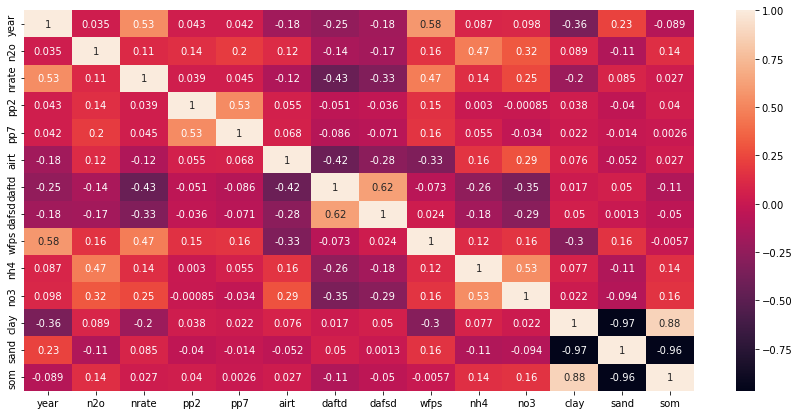

In [24]:
# Checking for multicollinearity as we see few features with almost the same names
plt.figure(figsize=(15,7))
sns.heatmap(dnum.corr(), annot=True);

* 'sand' and 'clay' has high multicollinearity.
* 'daftd' and 'dafsd' has some multicollinearity.

In [25]:
# Checking the correlation of multicollinear features with target
collfeat = ['sand', 'clay', 'daftd', 'dafsd']
for feat in collfeat:
    print(f"{feat}: ", dnum[feat].corr(df['n2o']))

sand:  -0.11455284909205204
clay:  0.0892404927594882
daftd:  -0.1389999341443956
dafsd:  -0.1719780422816002


Dropping 'sand' due to negative correlation with target and dropping 'daftd' due to lower negative correlation with target.

In [26]:
dnum.drop(['sand', 'daftd'], axis=1, inplace=True)
dnum.head()

C:\Users\User\miniconda3\envs\tabular\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,n2o,nrate,pp2,pp7,airt,dafsd,wfps,nh4,no3,clay,som
0,2012,3.896742,170,0.00,0.00,-2.0,241,0.666508,11.046340,22.940812,62.5,1.174072
1,2012,2.190218,170,0.00,0.00,-2.4,242,0.640608,11.008087,22.959578,62.5,1.174072
2,2012,3.542594,170,3.30,8.64,0.3,250,0.728085,10.831669,23.221928,62.5,1.174072
3,2012,3.342870,170,0.00,8.13,-3.8,251,0.686872,10.849792,23.271978,62.5,1.174072
4,2012,2.947778,170,1.02,8.39,17.6,277,0.716221,10.204748,24.206855,62.5,1.174072


In [27]:
# Checking for features with variance < 0.1
low_var=[]
verylow_var=[]

for col in dnum:
    if dnum[col].var()<=0.1:
        low_var.append(col)
    elif dnum[col].var()<=0.05:
        verylow_var.append(col)

low_var = [feat for feat in low_var if feat not in verylow_var]

print("="*20, "\033[1;33m Features with low variance (<10%)\033[0m", "="*20)
print("No of features with less than 10% variance: ", len(low_var), "\n")
if len(low_var)>0:
    print(low_var,"\n")
print("="*20, "\033[1;31m Features with very low variance (<5%)\033[0m", "="*20)
print("\nNo of features with less than 5% variance: ", len(verylow_var), "\n")
if len(verylow_var)>0:
    print(verylow_var,"\n")

====================  Features with low variance (<10%) ====================
No of features with less than 10% variance:  1 

['wfps'] 

====================  Features with very low variance (<5%) ====================

No of features with less than 5% variance:  0 



In [28]:
# Descriptive stats of numerical features
dnum.describe(percentiles=[0.1, 0.25, 0.75, 0.9]).T #added 10 and 90th percentiles

,count,mean,std,min,10%,25%,50%,75%,90%,max
year,1868.0,2011.938437,3.573538,2002.000000,2006.000000,2011.000000,2013.000000,2014.000000,2016.000000,2017.000000
n2o,1868.0,7.223425,23.397230,0.000000,0.279429,0.874453,2.330000,5.761980,13.635037,593.072000
nrate,1868.0,145.665418,54.681676,0.000000,67.000000,135.000000,170.000000,170.000000,202.000000,213.000000
pp2,1868.0,5.439638,10.368613,0.000000,0.000000,0.000000,0.510000,6.350000,19.000000,95.250000
pp7,1868.0,19.952823,24.428425,0.000000,0.000000,3.817500,12.700000,28.771500,47.403000,260.090000
airt,1868.0,12.263800,9.486246,-20.700000,-2.000000,5.600000,14.150000,19.947500,22.900000,30.400000
dafsd,1868.0,199.484475,139.421916,0.000000,26.700000,77.000000,176.000000,320.000000,365.000000,678.000000
wfps,1868.0,0.533509,0.168539,0.024388,0.317040,0.390203,0.554393,0.678572,0.731934,0.912113
nh4,1868.0,11.924255,13.719633,1.383393,3.436454,5.592498,9.246218,12.943366,22.369771,228.525000
no3,1868.0,25.731958,24.826300,0.370070,4.983108,11.128203,21.350881,27.692668,50.676605,238.920000


##### Observations:
* Most of the numerical data are right skewed and with extreme outliers.
* Mean N2O flux levels lies around 15ppb/yr.
* Average air temperature recorded during the study is around 12 degree celsius with a minimum of -20 degree celsius.
* Almost half of the data were recorded when there was no rain 2 days prior to the date of recording.

### Visualizing Numerical features

In [29]:
# Dropping 'year' from dnum
dnum.drop('year', axis=1, inplace=True)

C:\Users\User\miniconda3\envs\tabular\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



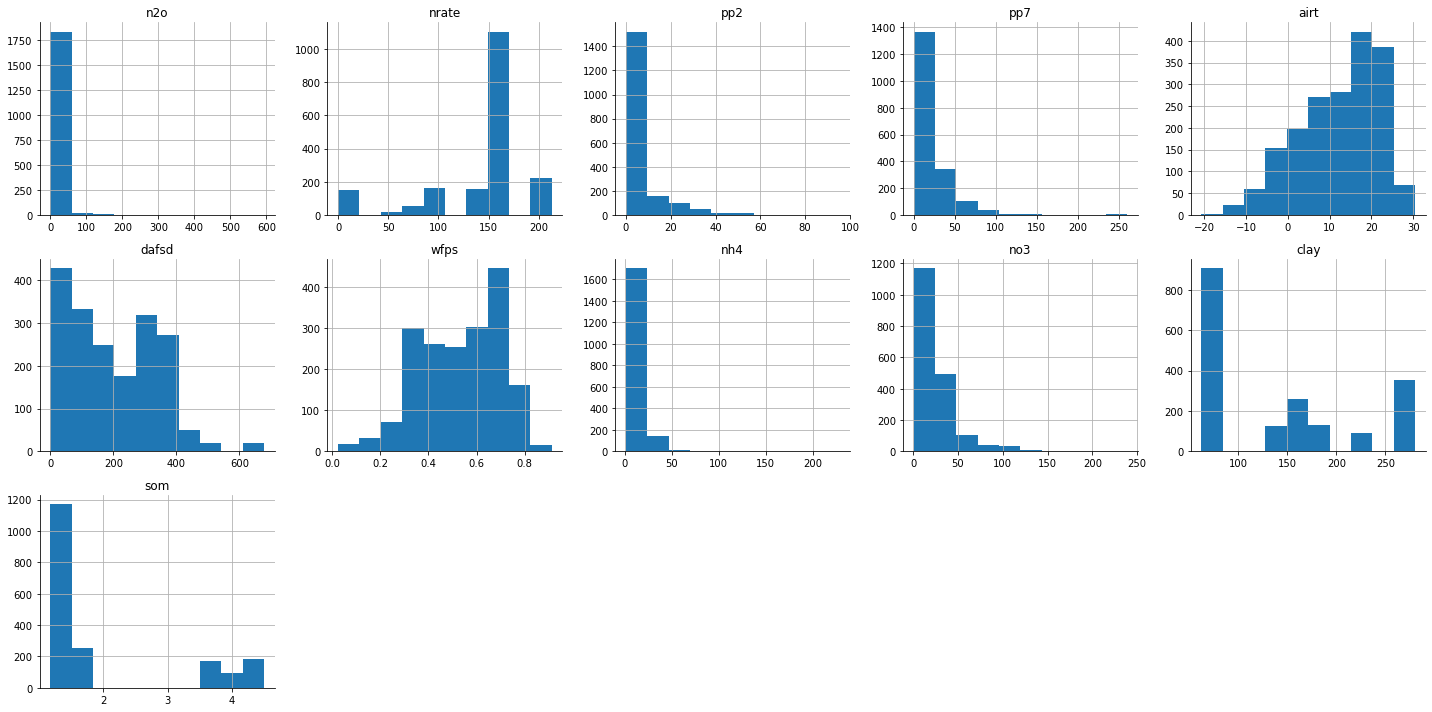

In [30]:
# Plotting the distribution of numerical features
dnum.hist(figsize=(20,10), layout=(3,5))
plt.tight_layout()

##### Observations:
* 'date' and 'airt' is slightly left skewed
* 'daftd', 'dafsd' and 'date' exhibits some bimodality.
* 'n2o', 'pp2', 'pp7', 'nh4' and 'no3' are right skewed

In [31]:
# Dropping samples corresponding to negative values for 'n2o'
airt_neg_index = list(dnum[dnum['airt']<0].index)
dnum.drop(airt_neg_index, axis=0, inplace=True)
dcat.drop(index=airt_neg_index, inplace=True)

In [32]:
# Applying sqrt transformation on target
dnum['n2o'] = np.sqrt(dnum['n2o'])

C:\Users\User\AppData\Local\Temp/ipykernel_4156/182477956.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
# function for plotting numerical feature distribution against continuous target
def plot_xnum_ynum(df, target, alpha=0.2, size=(15,6), ticksize=13, fontsize=14):
    print("    ","="*35, "\033[1;34;47m Distribution of Numerical Features wrt Target \033[0m", "="*35)
    plt.figure(figsize=size)
    plotnumber=1

    for col in df:
        if plotnumber < df.shape[1]:
            ax = plt.subplot(3,5,plotnumber)
            plt.scatter(data=df, x=col, y=target, color='#724BC8', alpha=alpha)
            plt.xticks(fontsize=ticksize)
            plt.yticks(fontsize=ticksize)
            plt.xlabel(col, fontsize=12)
        plotnumber +=1
    plt.tight_layout()

     ===================================  Distribution of Numerical Features wrt Target  ===================================


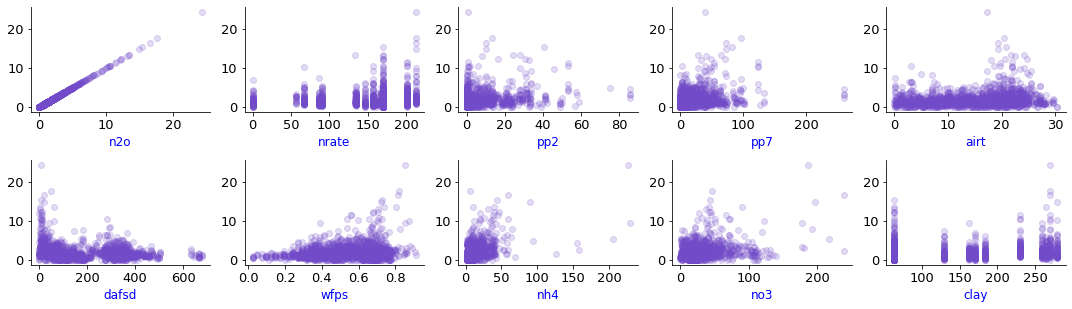

In [34]:
# Visualizing the distribution of numerical features with respect to Target
plot_xnum_ynum(dnum, 'n2o')

##### Observations:
* There is no linear relationship between numerical features and the target.
* Two outliers corresponding to 'n2o' values of around 600 are of concern for almost all of the features and hence can be dropped.

In [35]:
# dropping rows corresponding to 2 largest values from 'n2o'
idx = dnum.nlargest(2,['n2o']).index # index of values to be dropped
dnum.drop(index=idx, inplace=True)
dcat.drop(index=idx, inplace=True)

In [36]:
# Applying square transformation on 'nrate' and 'wfps'
df['nrate'] = np.square(df['nrate'])
df['wfps'] = np.square(df['wfps'])

# Applying square root transformation on 'dafsd'
df['dafsd'] = np.sqrt(df['dafsd'])

     ===================================  Distribution of Numerical Features wrt Target  ===================================


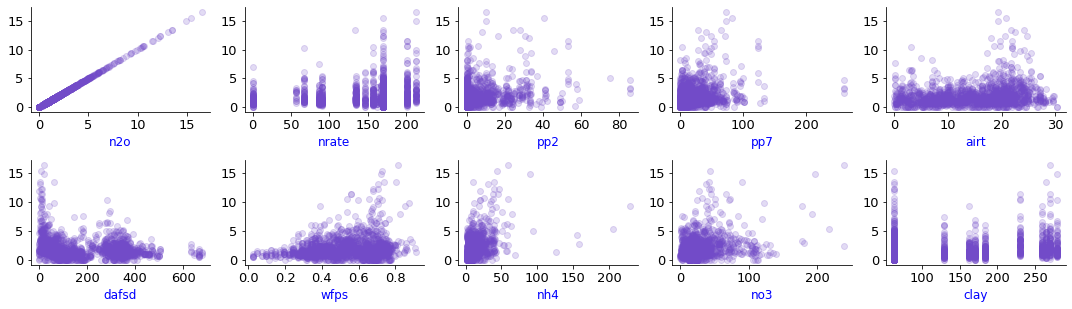

In [37]:
plot_xnum_ynum(dnum, 'n2o')

### Categorical Features

In [38]:
# Descriptive stats of categorical features
dcat.describe()

,exp,datause,rep,month,veg
count,1620,1620,1620,1620,1620
unique,3,2,5,12,3
top,BCSE_KBS,Building,R1,July,Corn
freq,736,1128,935,232,1330


##### Observations:
* Corn was the most used crop for the study and constitutes more than 80% of all crops used.
* Most of the yearly data was recorded on 2013.
* Most of the monthly data was recorded for July.

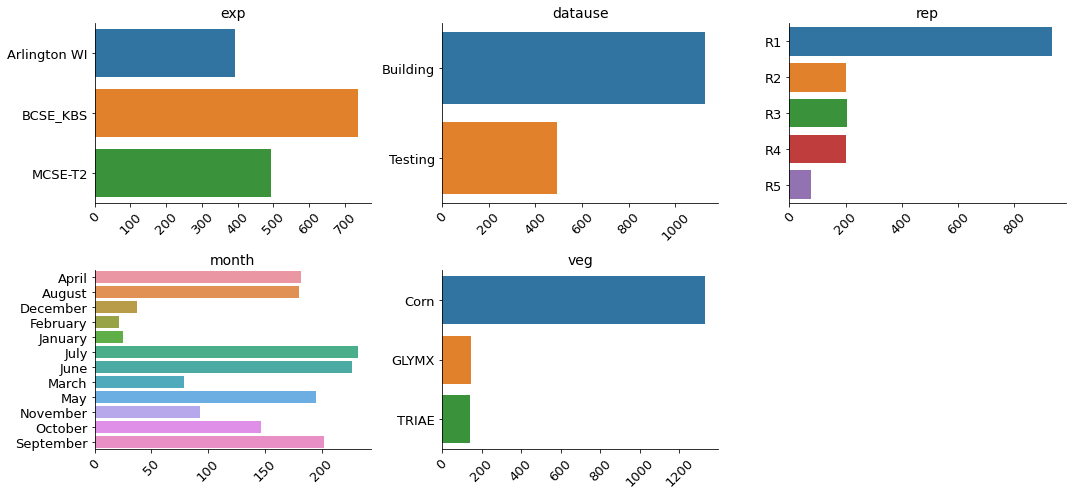

In [39]:
# Plotting Categorical features distribution
plt.figure(figsize=(15,7))
plotnumber = 1

for col in dcat:
    if plotnumber <= 5:
        ax1 = plt.subplot(2,3,plotnumber)
        sns.countplot(data=dcat, y=col)
        plt.xticks(fontsize=13, rotation=45)
        plt.yticks(fontsize=13)
        plt.title(f"{col}", fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

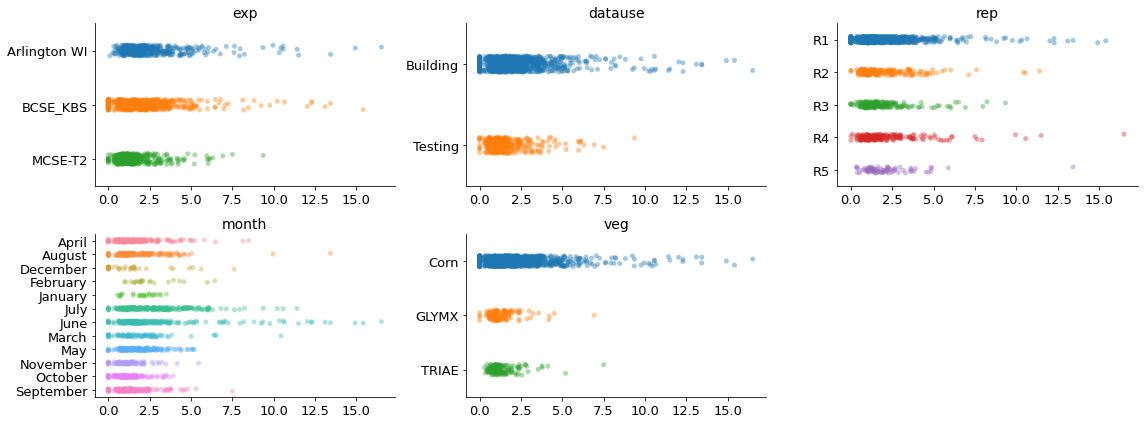

In [40]:
# Plotting Categorical features distribution across 'n2o'
plt.figure(figsize=(16,6))
plotnumber=1

for col in dcat:
    if plotnumber <= 5:
        ax = plt.subplot(2,3,plotnumber)
        sns.stripplot(y=dcat[col], x=dnum['n2o'], alpha=0.4)
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlabel('')
        plt.ylabel('')
        plt.title(col, fontsize=14)
    plotnumber +=1
plt.tight_layout()

##### Observations:
* June and July months followed by August contributes to highest 'n2o' concentrations and exhibits an observable correlation with 'n2o'.


* Corn produces more 'n2o' compared to soybean and wheat. Though no relationship can be observed for wheat and soybean with 'n2o', a significant change of pattern is visible for corn and other 'veg' with 'n2o'. Also, no difference in relationship can be observed for 'GLYMX' and 'TRIAE' with 'n2o'. Hence we may combine this to create another category.


* nrates of 134-157 and 170+ contributes more towards 'n2o' concentrations. Higher values of 'nrate'(above 170) indicates higher 'n2o' concentrations.


* soil with 62 or 230+ g/kg clay contributes more to 'n2o' concentrations. A relationship can be observed for clay values above and below 230 with 'n2o'.


* 55-125 g/kg of sand in soil contributes more to 'n2o' concentrations. A relationship can be observed for sand values above and below 125 with 'n2o'.


* Increase in soil organic matter in propotion to higher 'n2o' concentrations can be observed. Though the difference is negligible between 3-4%, a considerable difference exits between 1-3% of soil organic matter.

## Categorical Feature Selection

In [41]:
# Checking for imbalanced categorical features
mod_imb=[] # moderately imbalanced
hi_imb=[] # highly imbalanced

for col in dcat.columns:
    try:
        if (dcat[col].value_counts()/dcat.shape[0]).max() > 0.9:
            hi_imb.append(col)
        elif (dcat[col].value_counts()/dcat.shape[0]).max() > 0.7 and col not in hi_imb:
            mod_imb.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
print(mod_imb, "\n")
print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
print(hi_imb)

====================  Imbalanced features ====================
No of moderately imbalanced features (75%+ data on a single class):  1 

['veg'] 

No of highly imbalanced features (90%+ data on a single class):  0 

[]


In [42]:
encode_feat = list(dcat.columns)
encode_feat.remove('month')
encode_feat

['exp', 'datause', 'rep', 'veg']

In [43]:
# Ordinal encoding categorical features except 'month'
for feat in encode_feat:    
    feat_val = list(1+np.arange(dcat[feat].nunique()))
    feat_key = list(dcat[feat].sort_values().unique())
    feat_dict = dict(zip(feat_key, feat_val))

    dcat[feat] = dcat[feat].map(feat_dict)

C:\Users\User\AppData\Local\Temp/ipykernel_4156/3637585068.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
dmonth = pd.get_dummies(dcat['month'])
dcat = pd.concat([dcat, dmonth], axis=1)
dcat.drop('month', axis=1, inplace=True)

In [45]:
dcat.head()

,exp,datause,rep,veg,April,August,December,February,January,July,June,March,May,November,October,September
2,2,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
5,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
6,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0
7,2,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
# Changing dcatf_ord to 'float'
for col in dcat:
    dcat[col] = dcat[col].astype('float')

In [47]:
# Reset index to avoid 'nan' values on concatenating
dnum.reset_index(drop=True, inplace=True)
dcat.reset_index(drop=True, inplace=True)

# Combining numerical and categorical dataframes
df = pd.concat([dnum, dcat], axis=1)
print(df.shape)
df.head()

(1620, 27)


,n2o,nrate,pp2,pp7,airt,dafsd,wfps,nh4,no3,clay,som,exp,datause,rep,veg,April,August,December,February,January,July,June,March,May,November,October,September
0,1.882178,170,3.30,8.64,0.3,250,0.728085,10.831669,23.221928,62.5,1.174072,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.716910,170,1.02,8.39,17.6,277,0.716221,10.204748,24.206855,62.5,1.174072,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.465077,170,1.02,8.39,19.1,278,0.706733,10.103312,24.395334,62.5,1.174072,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.266374,170,0.00,35.81,2.2,291,0.714636,9.531861,25.331995,62.5,1.174072,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000000,170,6.35,7.11,3.3,292,0.711381,9.549558,25.390144,62.5,1.174072,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [48]:
# Saving data
import joblib
joblib.dump(df, 'df_beforeSMOTE_feedback.sav')

['df_beforeSMOTE_feedback.sav']

### Upsampling using SMOTE wrt 'veg'

In [49]:
from collections import Counter
from imblearn.over_sampling import SMOTE

major = df.drop('veg', axis=1)
minor = df['veg']

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=1.0, n=1330 (82.10%)
Class=2.0, n=146 (9.01%)
Class=3.0, n=144 (8.89%)


In [50]:
oversample = SMOTE()

major, minor = oversample.fit_resample(major, minor)

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=1.0, n=1330 (33.33%)
Class=2.0, n=1330 (33.33%)
Class=3.0, n=1330 (33.33%)


In [51]:
# Creating dataframe
df = pd.concat([major, minor], axis=1)
print(df.shape)
df.head()

(3990, 27)


,n2o,nrate,pp2,pp7,airt,dafsd,wfps,nh4,no3,clay,som,exp,datause,rep,April,August,December,February,January,July,June,March,May,November,October,September,veg
0,1.882178,170,3.30,8.64,0.3,250,0.728085,10.831669,23.221928,62.5,1.174072,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.716910,170,1.02,8.39,17.6,277,0.716221,10.204748,24.206855,62.5,1.174072,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.465077,170,1.02,8.39,19.1,278,0.706733,10.103312,24.395334,62.5,1.174072,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.266374,170,0.00,35.81,2.2,291,0.714636,9.531861,25.331995,62.5,1.174072,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,170,6.35,7.11,3.3,292,0.711381,9.549558,25.390144,62.5,1.174072,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [52]:
# Checking whether upsampling created any missing values in the dataset
df.isnull().sum()

n2o          0
nrate        0
pp2          0
pp7          0
airt         0
dafsd        0
wfps         0
nh4          0
no3          0
clay         0
som          0
exp          0
datause      0
rep          0
April        0
August       0
December     0
February     0
January      0
July         0
June         0
March        0
May          0
November     0
October      0
September    0
veg          0
dtype: int64

In [53]:
# Checking for imbalanced categorical features
mod_imb=[] # moderately imbalanced
hi_imb=[] # highly imbalanced

for col in df:
    try:
        if (df[col].value_counts()/df.shape[0]).max() > 0.9:
            hi_imb.append(col)
        elif (df[col].value_counts()/df.shape[0]).max() > 0.7 and col not in hi_imb:
            mod_imb.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
print(mod_imb, "\n")
print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
print(hi_imb)

====================  Imbalanced features ====================
No of moderately imbalanced features (75%+ data on a single class):  9 

['exp', 'datause', 'April', 'August', 'July', 'June', 'May', 'October', 'September'] 

No of highly imbalanced features (90%+ data on a single class):  5 

['December', 'February', 'January', 'March', 'November']


In [54]:
major = df.drop('exp', axis=1)
minor = df['exp']

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=2.0, n=736 (18.45%)
Class=1.0, n=392 (9.82%)
Class=3.0, n=2862 (71.73%)


In [55]:
oversample = SMOTE()

major, minor = oversample.fit_resample(major, minor)

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=2.0, n=2862 (33.33%)
Class=1.0, n=2862 (33.33%)
Class=3.0, n=2862 (33.33%)


In [56]:
# Creating dataframe
df = pd.concat([major, minor], axis=1)
print(df.shape)
df.head()

(8586, 27)


,n2o,nrate,pp2,pp7,airt,dafsd,wfps,nh4,no3,clay,som,datause,rep,April,August,December,February,January,July,June,March,May,November,October,September,veg,exp
0,1.882178,170,3.30,8.64,0.3,250,0.728085,10.831669,23.221928,62.5,1.174072,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1.716910,170,1.02,8.39,17.6,277,0.716221,10.204748,24.206855,62.5,1.174072,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,1.465077,170,1.02,8.39,19.1,278,0.706733,10.103312,24.395334,62.5,1.174072,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,1.266374,170,0.00,35.81,2.2,291,0.714636,9.531861,25.331995,62.5,1.174072,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.000000,170,6.35,7.11,3.3,292,0.711381,9.549558,25.390144,62.5,1.174072,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0


In [57]:
major = df.drop('datause', axis=1)
minor = df['datause']

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=1.0, n=5724 (66.67%)
Class=2.0, n=2862 (33.33%)


In [58]:
oversample = SMOTE()

major, minor = oversample.fit_resample(major, minor)

counter = Counter(minor)

for k, v in counter.items():
    per = 100*v/len(minor)
    print(f"Class={k}, n={v} ({per:.2f}%)")

Class=1.0, n=5724 (50.00%)
Class=2.0, n=5724 (50.00%)


In [59]:
# Creating dataframe
df = pd.concat([major, minor], axis=1)
print(df.shape)
df.head()

(11448, 27)


,n2o,nrate,pp2,pp7,airt,dafsd,wfps,nh4,no3,clay,som,rep,April,August,December,February,January,July,June,March,May,November,October,September,veg,exp,datause
0,1.882178,170,3.30,8.64,0.3,250,0.728085,10.831669,23.221928,62.5,1.174072,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
1,1.716910,170,1.02,8.39,17.6,277,0.716221,10.204748,24.206855,62.5,1.174072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
2,1.465077,170,1.02,8.39,19.1,278,0.706733,10.103312,24.395334,62.5,1.174072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
3,1.266374,170,0.00,35.81,2.2,291,0.714636,9.531861,25.331995,62.5,1.174072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0
4,0.000000,170,6.35,7.11,3.3,292,0.711381,9.549558,25.390144,62.5,1.174072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0


In [60]:
df['datause'].unique()

array([1., 2.])

In [61]:
# Checking for imbalanced categorical features
mod_imb=[] # moderately imbalanced
hi_imb=[] # highly imbalanced

for col in df:
    try:
        if (df[col].value_counts()/df.shape[0]).max() > 0.9:
            hi_imb.append(col)
        elif (df[col].value_counts()/df.shape[0]).max() > 0.7 and col not in hi_imb:
            mod_imb.append(col)
    except Exception as e:
        print(f"Couldn't check \033[1m{col}\033[0m. ", e, "\n")

print("="*20, "\033[1m Imbalanced features\033[0m", "="*20)
print("No of moderately imbalanced features (75%+ data on a single class): ", len(mod_imb), "\n")
print(mod_imb, "\n")
print("No of highly imbalanced features (90%+ data on a single class): ", len(hi_imb), "\n")
print(hi_imb)

====================  Imbalanced features ====================
No of moderately imbalanced features (75%+ data on a single class):  7 

['April', 'August', 'July', 'June', 'May', 'October', 'September'] 

No of highly imbalanced features (90%+ data on a single class):  5 

['December', 'February', 'January', 'March', 'November']


In [62]:
# Saving dataframe
joblib.dump(df, 'data_afterSMOTE_feedback.sav')

['data_afterSMOTE_feedback.sav']

# Summary of EDA:
### Dataset
* No of features:  2246
* No of observations:  21 
* Total missing values in the dataset:  158
* No of duplicate values in the dataset:  0 
* No of constant features:  1
* Constant features: **vegtype** 
* Features with variance < 0.1:  **wfps**

### Target variable
* Negative values present for nitrous oxide concentration. These are due to the conversion of nitrous oxide data between 0 and automated chamber's detection limit to 50% of the detection limit.
* 75% of the data is within 1 std deviation from the mean.
* Heavily right skewed data
* Two extreme outliers.

### Numerical features
* Most of the numerical data are right skewed and with extreme outliers.


* Almost half of the data were recorded when there was no rain 2 days prior to the date of recording.


* Nearly 10% of the data were recorded under freezing conditions and most of the data under cold climate.


* 'daftd', 'dafsd' and 'wfps' have a bimodal distribution.


* 'n2o', 'pp2', 'pp7', 'nh4' and 'no3' are right skewed


* There is **no linear relationship** between numerical features and the target.


* Positively skewed features:  \['n2o', 'pp2', 'pp7', 'nh4', 'no3'\]


* No Negatively skewed features


* Outliers in 'n2o': 11.18 %


* Outliers in 'pp2': 10.86 %


* Outliers in 'pp7': 5.08 %


* Outliers in 'airt': 3.21 %


* Outliers in 'wfps': 2.76 %


* Outliers in 'nh4': 9.57 %


* Outliers in 'no3': 8.9 %


* Outliers in 'mean_daf': 1.07 %


### Categorical features
* Corn was the most used crop for the study and constitutes more than 80% of all crops used. GLYMX(soybean) and TRIAE(wheat) combined represents only near about 20% of the total crop data in the dataset. Corn produces higher rates of nitrous oxide compared to soybean and wheat. Though no relationship can be observed for wheat and soybean with 'n2o', a significant change of pattern is visible for corn and other 'veg' with 'n2o'.


* Highest number of observations was taken on July followed by June. A seasonal pattern can be observed between 'n2o' concentration and month. June and July months followed by August contributes to highest 'n2o' concentrations and exhibits an observable correlation with 'n2o'.


* 170 kg/ha was the highest recorded nitrogen fertilizer application rate across the data. Rates of 134-157kg/ha and more than 170kg/ha contributes more towards nitrous oxide concentrations. Higher values of 'nrate'(above 170) contributes towards higher 'n2o' concentrations.


* Highest number of observations were recorded for 62 g/kg of clay. A clear decreasing pattern of observations is visible per 100 g/kg of clay. Soil with 62 or 230+ g/kg clay contributes more to nitrous oxide concentrations. A relationship can be observed for clay values above and below 230 with 'n2o'.


* Highest number of observations were recorded for 637 g/kg of sand. Though second highest observations for sand is at 55 g/kg, an increasing pattern can be observed for quantities higher than 55 g/kg. 55-125 g/kg of sand in soil contributes more to 'n2o' concentrations. A relationship can be observed for sand values above and below 125 with 'n2o'.


* Highest number of observations recorded for 1% soil organic matter. A decreasing trend can be observed thereafter. Increase in soil organic matter in propotion to higher 'n2o' concentrations can be observed. Though the difference is negligible between 3-4%, a considerable difference exits between 1-3% of soil organic matter.

# Scaling features

In [63]:
from sklearn.model_selection import train_test_split

y = df['n2o']
X = df.drop('n2o', axis=1)

train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=42 )

In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = scaler.fit(train_x)

train_x_scaled = scaled.transform(train_x)

# saving scaler
import pickle
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaled, file)

test_x_scaled = scaled.transform(test_x)

train_x_scaled = pd.DataFrame(train_x_scaled, columns=X.columns)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=X.columns)

# Best Baseline Model

In [65]:
# To know the best baseline model
def best_model(models, X, y, nsplits=10, scoring ='neg_mean_squared_error'):
    from sklearn.model_selection import cross_val_score, KFold
    
    results=[]
    names = []

    for name, model in models:
        kfold = KFold(n_splits=nsplits, shuffle=True, random_state=7)
        cv_results = cross_val_score(model, 
                                     X, y, 
                                     cv=kfold, 
                                     scoring=scoring,
                                     n_jobs=-1
                                    )
        results.append(cv_results)
        names.append(name)
        plot_dict = dict(zip(names, results))
        msg = f"{name} >> Mean score:{round(cv_results.mean(),3)},\
        Range:{(round(cv_results.max(),5) - round(cv_results.min(),5)):0.3f},\
            Max score:{round(cv_results.max(),3)}"
        print(msg)

    # boxplot of models for comparison
    import matplotlib.pyplot as plt
    import seaborn as sns
    fig = plt.figure(figsize=(10,5))
    fig.suptitle('Comparison of base models', fontsize=20)
    ax = fig.add_subplot(111)
    mean_props=dict(marker="D", 
                    markersize=7, 
                    markerfacecolor='salmon', 
                    markeredgecolor='black', 
                    linewidth=2)
    box = plt.boxplot(results, 
                      vert=False, 
                      showmeans=True, 
                      meanprops=mean_props,
                      medianprops=dict(markeredgecolor='black'),
                      patch_artist=True)
    
    colors = ['mistyrose', 'lavender', 'papayawhip', 'lightgreen']
    
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
        
    ax.set_yticklabels(names)
    ax.set_xlabel("Negative Mean Squared Error")
    plt.savefig('baseline_model_comparison.png')
    plt.show()

In [66]:
# Feeding some base models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBRegressor()))

KNN >> Mean score:-0.276,        Range:0.182,            Max score:-0.195
SVR >> Mean score:-0.666,        Range:0.245,            Max score:-0.518
RF >> Mean score:-0.18,        Range:0.108,            Max score:-0.148
XGB >> Mean score:-0.208,        Range:0.099,            Max score:-0.162


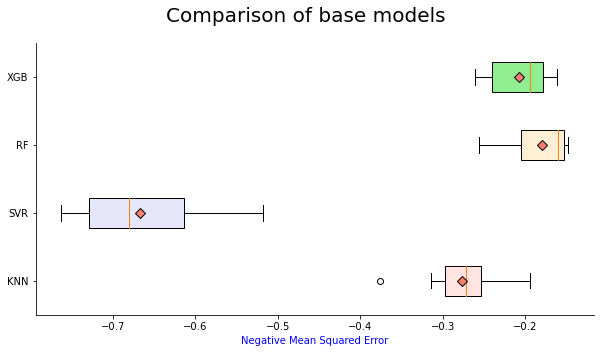

Wall time: 20.4 s


In [67]:
%%time
# Finding the best baseline model for 10 Fold cross validation
best_model(models, train_x_scaled, train_y, nsplits=10)

##### Going with 10 Fold RandomForestRegressor as the base model

In [68]:
from sklearn.model_selection import cross_val_score
# Function for calculating scores
def calculate_score(model):
    train_scores = cross_val_score(model, train_x_scaled, train_y, cv=10)
    test_scores = cross_val_score(model, test_x_scaled, test_y, cv=10)
    
    # Function to calculate adjusted R2
    def adj_r2(x,y, r2):
        n = x.shape[0] # observations in dataset
        p = x.shape[1] # features in dataset
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    train_scores_adj = adj_r2(train_x_scaled, train_y, train_scores)
    test_scores_adj = adj_r2(test_x_scaled, test_y, test_scores)

    # Checking how the model fits the training data
    print("Adjusted R2 on training data: ", np.round(np.mean(train_scores_adj), 3))
    print("Adjusted R2 on testing data: ", np.round(np.mean(test_scores_adj), 3), "\n")

In [69]:
rf = RandomForestRegressor()
calculate_score(rf)

Adjusted R2 on training data:  0.917
Adjusted R2 on testing data:  0.81 



### Model performance

In [70]:
from sklearn.model_selection import cross_val_score
# Function for calculating scores
def calculate_score(model, k):
    train_scores = cross_val_score(model, train_x_scaled, train_y, cv=k)
    test_scores = cross_val_score(model, test_x_scaled, test_y, cv=k)
    
    # Function to calculate adjusted R2
    def adj_r2(x,y, r2):
        n = x.shape[0] # observations in dataset
        p = x.shape[1] # features in dataset
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    train_scores_adj = adj_r2(train_x_scaled, train_y, train_scores)
    test_scores_adj = adj_r2(test_x_scaled, test_y, test_scores)

    # Checking how the model fits the training data
    trainsa = np.round(np.mean(train_scores_adj), 3)
    testsa = np.round(np.mean(test_scores_adj), 3)
    
    return trainsa, testsa

In [71]:
# Calculating model performance

rf = RandomForestRegressor()

from tqdm import tqdm

trainscore = []
testscore = []
nfold = []

for k in tqdm(range(5, 11)):
    trs, tss = calculate_score(rf, k)
    trainscore.append(trs)
    testscore.append(tss)
    nfold.append(k)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:35<00:00, 45.98s/it]


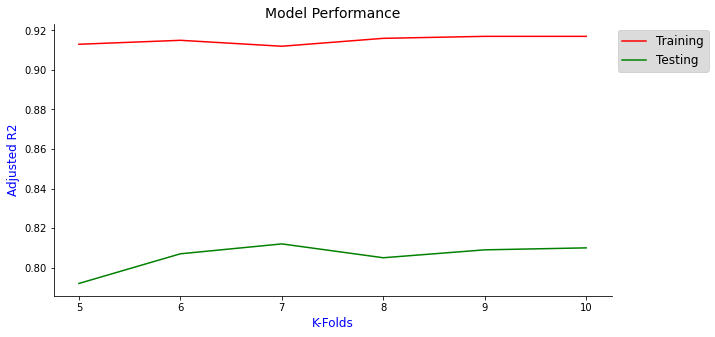

In [72]:
# Plotting Model performance
plt.figure(figsize=(10,5))
sns.lineplot(x=nfold, y=trainscore, color='red')
sns.lineplot(x=nfold, y=testscore, color='green')
plt.xlabel('K-Folds', fontsize=12)
plt.ylabel('Adjusted R2', fontsize=12)
plt.legend(['Training', 'Testing'], fontsize=12, bbox_to_anchor= (1,1)).get_frame().set_facecolor('lightgrey')
plt.title('Model Performance', fontsize=14)
plt.show()

As of now, 7 fold CV is the best option.

In [76]:
# Function for calculating scores
def calculate_score(model):
    train_scores = cross_val_score(model, train_x_scaled, train_y, cv=7)
    test_scores = cross_val_score(model, test_x_scaled, test_y, cv=7)
    
    # Function to calculate adjusted R2
    def adj_r2(x,y, r2):
        n = x.shape[0] # observations in dataset
        p = x.shape[1] # features in dataset
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
        return adjusted_r2
    
    train_scores_adj = adj_r2(train_x_scaled, train_y, train_scores)
    test_scores_adj = adj_r2(test_x_scaled, test_y, test_scores)

    # Checking how the model fits the training data
    print("Adjusted R2 on training data: ", np.round(np.mean(train_scores_adj), 3))
    print("Adjusted R2 on testing data: ", np.round(np.mean(test_scores_adj), 3), "\n")

In [77]:
rf = RandomForestRegressor()
calculate_score(rf)

Adjusted R2 on training data:  0.912
Adjusted R2 on testing data:  0.811 



In [78]:
# Going with RandomForestRegressor
# Fitting the model
rf.fit(train_x_scaled, train_y)

# Saving fitted model
with open('final_model.pickle', 'wb') as file:
    pickle.dump(rf, file)

# Explainable AI

In [79]:
import shap

In [77]:
# explainer = shap.TreeExplainer(rf)

In [81]:
# %%time
# shap_values = explainer.shap_values(train_x_scaled)

Wall time: 1h 16s


In [86]:
# with open('shapvalues.pickle', 'wb') as f:
#     pickle.dump(shap_values, f)

In [ ]:
# class ExplainableAI(df):
#     import shap, pickle
    
#     def __init__(self, df):
#         self.df = df
#         self.explainer = shap.TreeExplainer(self.df)
#         self.shap_values = selfl.explainer.shap_values(self.df)
#         with open('shapvalues.pickle', 'rb') as f:
#             self.shap_values=pickle.load(f)
    
#     def shap_summary_plot(df):
#         features = list(train_x_scaled.columns)
#         shap.summary_plot(self.shap_values, self.df, feature_names=features)
        
#     def shap_dependance_plot(df, feats):
#         for feat in feats:
#             shap.dependence_plot(feat, self.shap_values, df)

In [80]:
with open('shapvalues.pickle', 'rb') as f:
    shap_values=pickle.load(f)

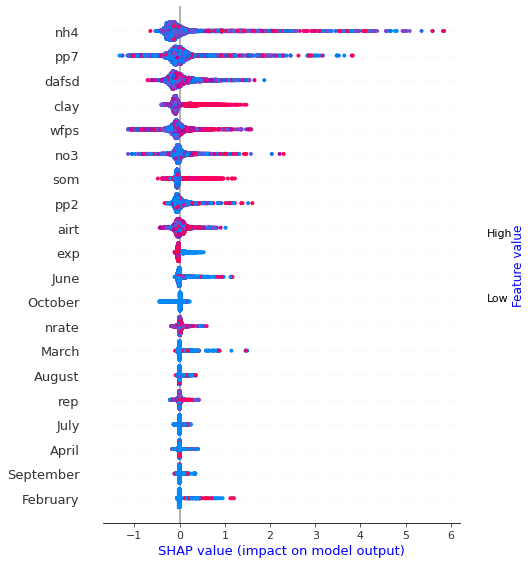

In [81]:
features = list(train_x_scaled.columns)
shap.summary_plot(shap_values, train_x_scaled, feature_names=features)

In [113]:
selected_features = ['nh4', 'pp7', 'clay', 'dafsd', 'wfps', 'no3', 'som', 'airt', 'nrate']
train_x_scaled = train_x_scaled[selected_features]
test_x_scaled = test_x_scaled[selected_features]

In [83]:
rf = RandomForestRegressor()
calculate_score(rf)

Adjusted R2 on training data:  0.906
Adjusted R2 on testing data:  0.805 



In [84]:
# Fitting the model
rf.fit(train_x_scaled, train_y)

# Saving fitted model
with open('explained_model.pickle', 'wb') as file:
    pickle.dump(rf, file)

In [85]:
# explainer = shap.TreeExplainer(rf)

In [86]:
# %%time
# shap_values = explainer.shap_values(train_x_scaled)

Wall time: 25min 47s


In [87]:
# with open('explained_shapvalues.pickle', 'wb') as f:
#     pickle.dump(shap_values, f)

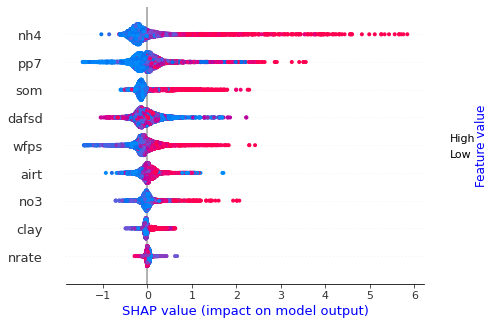

In [88]:
features = list(train_x_scaled.columns)
shap.summary_plot(shap_values, train_x_scaled, feature_names=features)

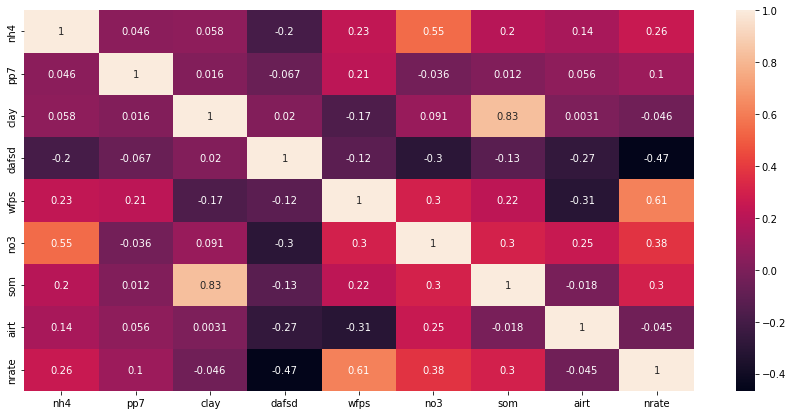

In [92]:
plt.figure(figsize=(15,7))
sns.heatmap(train_x_scaled.corr(), annot=True)

In [114]:
finalized_features=list(train_x_scaled.columns)
finalized_features.remove("clay")
finalized_features

['nh4', 'pp7', 'dafsd', 'wfps', 'no3', 'som', 'airt', 'nrate']

In [100]:
train_x_scaled = train_x_scaled[finalized_features]
test_x_scaled = test_x_scaled[finalized_features]

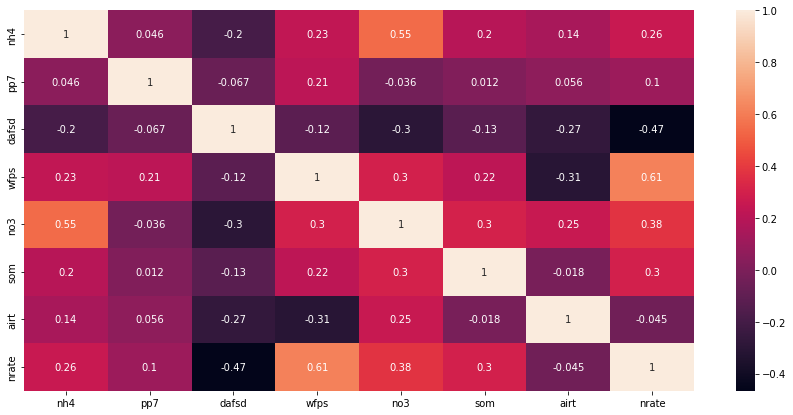

In [102]:
plt.figure(figsize=(15,7))
sns.heatmap(train_x_scaled.corr(), annot=True);

In [103]:
rf11 = RandomForestRegressor()
calculate_score(rf11)

Adjusted R2 on training data:  0.904
Adjusted R2 on testing data:  0.802 



In [124]:
finalized_features.remove('nrate')
finalized_features

['nh4', 'pp7', 'dafsd', 'wfps', 'no3', 'som', 'airt']

In [125]:
train_x_scaled = train_x_scaled[finalized_features]
test_x_scaled = test_x_scaled[finalized_features]

In [126]:
rf = RandomForestRegressor()
calculate_score1(rf)

Adjusted R2 on training data:  0.899
Adjusted R2 on testing data:  0.803 



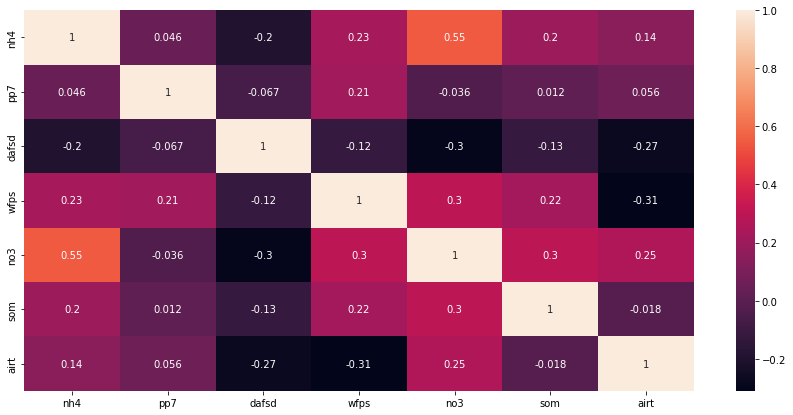

In [127]:
plt.figure(figsize=(15,7))
sns.heatmap(train_x_scaled.corr(), annot=True);

In [128]:
# Fitting the model
rf.fit(train_x_scaled, train_y)

# Saving final fitted model
with open('final_model.pickle', 'wb') as file:
    pickle.dump(rf, file)

In [130]:
explainer = shap.TreeExplainer(rf)

In [161]:
with open('explainer.pickle', 'wb') as f:
    pickle.dump(explainer, f)

In [131]:
%%time
shap_values = explainer.shap_values(train_x_scaled)

Wall time: 22min 9s


In [132]:
with open('explained_shapvalues.pickle', 'wb') as f:
    pickle.dump(shap_values, f)

In [ ]:
import os
os.mkdir('plots')

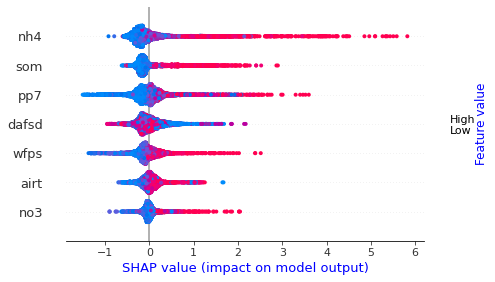

In [154]:
features = list(train_x_scaled.columns)
shap.summary_plot(shap_values, train_x_scaled, feature_names=features, show=False)
plt.savefig("plots/summaryplot.png")

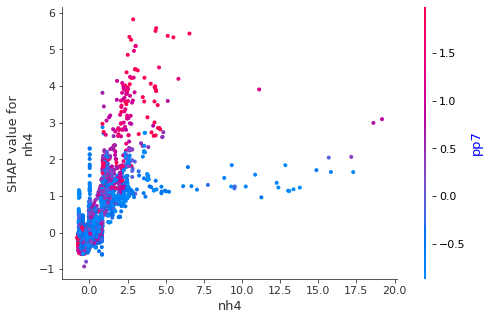

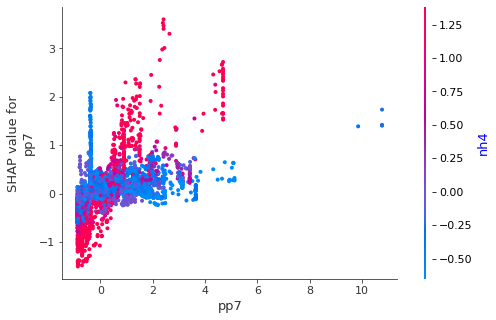

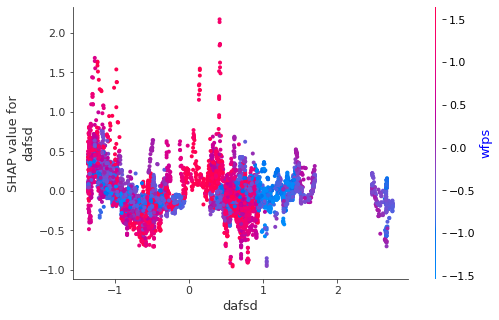

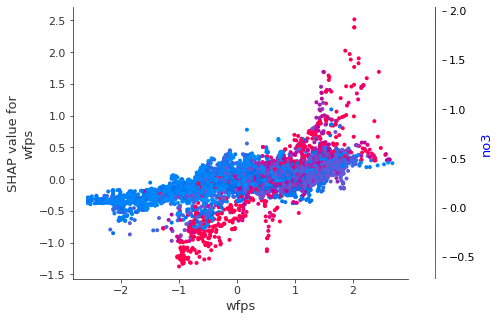

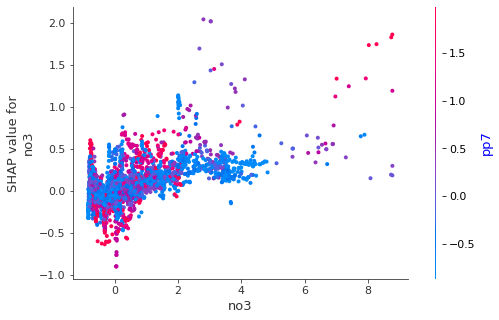

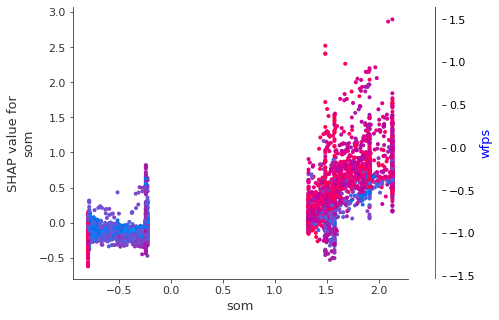

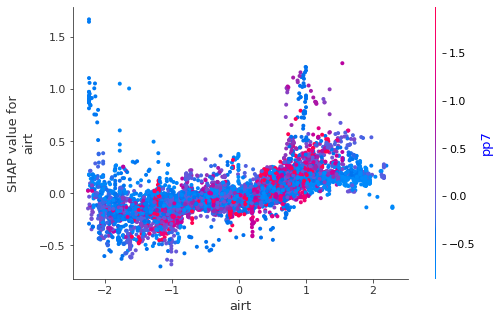

In [153]:
for feat in features:
    shap.dependence_plot(feat, shap_values, train_x_scaled, show=False)
    plt.savefig(f"plots/{feat}_dep_plot.png")

In [160]:
shap.force_plot(explainer.expected_value, shap_values[10,:], test_x_scaled.iloc[10,:], feature_names=features)

In [159]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0:5,:], test_x_scaled.iloc[0:5,:], plot_cmap="DrDb", feature_names=features)